In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import GraphicalLassoCV
import seaborn as sns

In [2]:
df = pd.read_csv('watertreatment_mod.csv', encoding='shift_jis', header=0, index_col=0)
TimeIndices = df.index
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
date,,,,,,,,,,,,,,,,,,,,,
D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-11/3/90,29156,2.5,7.7,206,451,194,69.1,4.5,1249,7.7,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
D-12/3/90,39246,2.0,7.8,172,506,200,69.0,5.0,1865,7.8,...,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
D-13/3/90,42393,0.7,7.9,189,478,230,67.0,5.5,1410,8.1,...,1575,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
D-18/3/90,40923,3.5,7.6,146,329,188,57.4,2.5,1300,7.6,...,1545,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2


In [3]:
split_point = 100
offset = 100
train_df = df.iloc[offset:offset+split_point,]
test_df = df.iloc[offset+split_point:offset+split_point*2,]
# print(train_df)
print(test_df)

              V1    V2   V3   V4   V5   V6    V7   V8    V9  V10  ...   V29  \
date                                                              ...         
D-2/10/90  54578  3.60  7.9  313  341  512  33.6  6.0   915  7.9  ...  1021   
D-3/10/90  36911  6.00  7.7  300  610  452  45.1  8.0  1313  7.7  ...  1133   
D-4/10/90  35244  6.00  7.8  177  412  196  69.4  4.5  2190  7.8  ...  2220   
D-5/10/90  39566  5.80  7.7  192  416  236  57.6  4.5  1447  7.6  ...  1408   
D-7/10/90  45469  1.97  7.3  129  237  234  38.5  1.5  1190  7.4  ...  1631   
...          ...   ...  ...  ...  ...  ...   ...  ...   ...  ...  ...   ...   
D-21/5/91  40295  0.90  7.7  238  327  194  60.8  5.9  1725  7.8  ...  1673   
D-22/5/91  38792  1.89  7.7  250  431  196  64.3  5.5  1219  7.9  ...  1197   
D-23/5/91  36162  2.50  7.4  224  421  204  68.6  5.0  1328  7.7  ...  1265   
D-26/5/91  36922  0.50  7.6  122  338  174  62.1  5.0  1035  7.7  ...  1140   
D-27/5/91  43497  2.10  7.8  134  323  190  61.1  4.

In [4]:
# # 置き換えたい行のインデックスのリスト
# test_df[test_df.columns[0]] = np.random.randint(0, 10, size=len(test_df))
# # print(train_df)
# print(test_df)

In [5]:
def standardize(_df):
    sc = StandardScaler()
    sc.fit(_df)
    df_std = sc.transform(test_df)
    return df_std

In [6]:
train_std = standardize(train_df)
test_std = standardize(test_df)
print(train_std)
print(test_std)

[[ 2.26138456  0.48334219  0.15583722 ...  0.12672217  1.09991076
   0.21488817]
 [-0.0555839   1.35962353 -0.60434435 ...  0.42424378  1.09991076
   0.16892278]
 [-0.27420542  1.35962353 -0.22425356 ...  0.11570285  0.24287719
   0.1229574 ]
 ...
 [-0.15381276  0.08171324 -1.7446167  ... -0.04958693  0.07453131
  -0.24476567]
 [-0.05414129 -0.64852122 -0.98443513 ...  1.08540291  0.51835227
   0.1229574 ]
 [ 0.80814816 -0.06433366 -0.22425356 ...  0.6115722   0.53365644
   0.1229574 ]]
[[ 2.10556002  0.55724562 -0.14336423 ... -0.12727441  1.54085144
   0.35684961]
 [-0.24685512  1.8261161  -0.98668325 ...  0.21774658  1.54085144
   0.22369677]
 [-0.46882128  1.8261161  -0.56502374 ... -0.14005297  0.00602966
   0.09054393]
 ...
 [-0.34658677 -0.02432002 -2.25166179 ... -0.3317313  -0.29545319
  -0.9746788 ]
 [-0.24539044 -1.08171208 -1.40834276 ...  0.9844599   0.49936523
   0.09054393]
 [ 0.63009094 -0.23579843 -0.56502374 ...  0.43498202  0.52677276
   0.09054393]]


In [7]:
train_cov = np.cov(train_std, rowvar=False)
test_cov = np.cov(test_std, rowvar=False)
print(train_cov.shape)
print(test_cov.shape)

(38, 38)
(38, 38)


In [8]:
def glasso_cov_prec_(array):
    model = GraphicalLassoCV()
    model.fit(array)
    cov_ = model.covariance_
    prec_ = model.precision_
    return cov_, prec_

In [9]:
train_cov_, train_prec_ = glasso_cov_prec_(train_std)
test_cov_, test_prec_ = glasso_cov_prec_(test_std)
print(test_cov_.shape)
print(test_prec_.shape)

c:\Users\kasariku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\covariance\_graph_lasso.py:167: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
c:\Users\kasariku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\covariance\_graph_lasso.py:168: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
c:\Users\kasariku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\covariance\_graph_lasso.py:167: RuntimeWarning: invalid value encountered in multiply
  precision_[indices != idx, idx] = -precision_[idx, idx] * coefs
c:\Users\kasariku\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\covariance\_graph_lasso.py:168: RuntimeWarning: invalid value encountered in multiply
  precision_[idx, indices != idx] = -precision_[idx, idx] * coefs
c:\Users\kasariku\AppData\Local\Programs\Python\Python31

(38, 38)
(38, 38)


c:\Users\kasariku\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:232: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [10]:
a = [0] * test_cov_.shape[0]
b1 = np.matmul(np.matmul(train_prec_, train_cov), train_prec_)
b2 = np.matmul(np.matmul(test_prec_, train_cov), test_prec_)
c1 = np.matmul(np.matmul(train_prec_, test_cov), train_prec_)
c2 = np.matmul(np.matmul(test_prec_, test_cov), test_prec_)
for i in range(test_cov_.shape[0]):
    v1 = 1 / 2 * np.log(train_cov_[i, i] / test_cov_[i, i]) - 1 / 2 * (b1[i, i] / train_prec_[i, i] - b2[i, i] / test_prec_[i, i])
    v2 = 1 / 2 * np.log(test_cov_[i, i] / train_cov_[i, i]) - 1 / 2 * (c2[i, i] / test_prec_[i, i] - c1[i, i] / train_prec_[i, i])
    a[i] = max(v1, v2)
print(a)

[0.10168938729659492, 0.9351752752243003, 0.23118485139473094, 0.3527965923958465, 0.2983032619108782, 0.011762322964365128, 0.15168289609899344, 0.0069123329760882035, 0.2529836621287598, 0.23579779404157178, 0.032893858896116575, 0.008476339958881904, 0.07671443417450767, 0.1008543529119536, 0.2475751992466146, 0.4203105576467653, 0.11977708756240348, 0.22855023530933277, 0.298501131633401, 0.09210715903384131, 0.8021561397534058, 0.4810714836340395, 0.603567096245889, 0.4589702097979633, 0.5094281903483895, 2.8694705873641735, 0.005557177714915927, 28.515072054502244, 0.5484001108519462, 0.024219367357130046, 0.04003334435587755, 0.5097198914972185, 0.6966238302267354, 0.6646642129888716, 0.2773372590529457, 0.20159879186576668, 1.3291426728235411, 4.920154790080697]


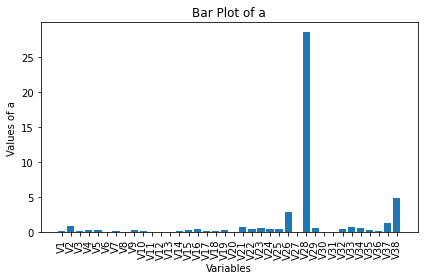

In [11]:
labels = df.columns

# 縦棒グラフを作成
plt.bar(range(len(a)), a, tick_label=labels)

# タイトルとラベルの設定
plt.title('Bar Plot of a')
plt.xlabel('Variables')
plt.ylabel('Values of a')

# X軸のラベルが見やすくなるように回転
plt.xticks(rotation=90)

# グラフの表示
plt.tight_layout()
plt.show()

In [12]:
# seabornのpairplotで相関プロットを作成
sns.pairplot(train_df)

# タイトルの設定
plt.suptitle('Pairplot of Columns in Numpy Array', y=1.02)

# グラフの表示
plt.show()

KeyboardInterrupt: 